## 输入特征

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

In [2]:
X=boston.data
y=boston.target

In [3]:
X.shape

(506, 13)

表明数据集有 506 个样本，13 个特征。下面，我们来看一个样本数据。

In [4]:
np.set_printoptions(suppress=True)
X[0]

array([   0.00632,   18.     ,    2.31   ,    0.     ,    0.538  ,
          6.575  ,   65.2    ,    4.09   ,    1.     ,  296.     ,
         15.3    ,  396.9    ,    4.98   ])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

## 模型训练

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()# normalize=True
model.fit(X_train,y_train)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print('训练数据集上的评分',train_score)
print('测试数据集上的评分',test_score)

训练数据集上的评分 0.723941029829
测试数据集上的评分 0.794957536475


+ 效果很一般，这是为什么呢？

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

def polynomial_model(degree=2):
    polynomial_features = PolynomialFeatures(degree=degree)
    std_scaler = StandardScaler()
    linear_reg = LinearRegression()
    pipeline = Pipeline([
        ('polynomial_features',polynomial_features),
        ('std_scaler',std_scaler),
        ('linear_reg',linear_reg)
    ])
    return pipeline

In [11]:
model = polynomial_model(degree=2)

In [12]:
model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [13]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print('训练数据集上的评分',train_score)
print('测试数据集上的评分',test_score)

训练数据集上的评分 0.930546879941
测试数据集上的评分 0.860465169324


下面我们看一看三阶多项式的预测效果。

In [14]:
model = polynomial_model(degree=3)
model.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print('训练数据集上的评分',train_score)
print('测试数据集上的评分',test_score)

训练数据集上的评分 1.0
测试数据集上的评分 -106.481041112


从结果可以看出，明显是产生了过拟合现象。

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias=False 可以认为是特征的 0 次幂，就是 1
polynomial_fea = PolynomialFeatures(degree=2,include_bias=False)
polynomial_fea_data = polynomial_fea.fit_transform(X_train)
print("原始 X_train 的特征个数",X_train.shape[1])
print("特征提升以后的 X_train 的特征个数",polynomial_fea_data.shape[1])

原始 X_train 的特征个数 13
特征提升以后的 X_train 的特征个数 104


## 画出学习曲线

In [25]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

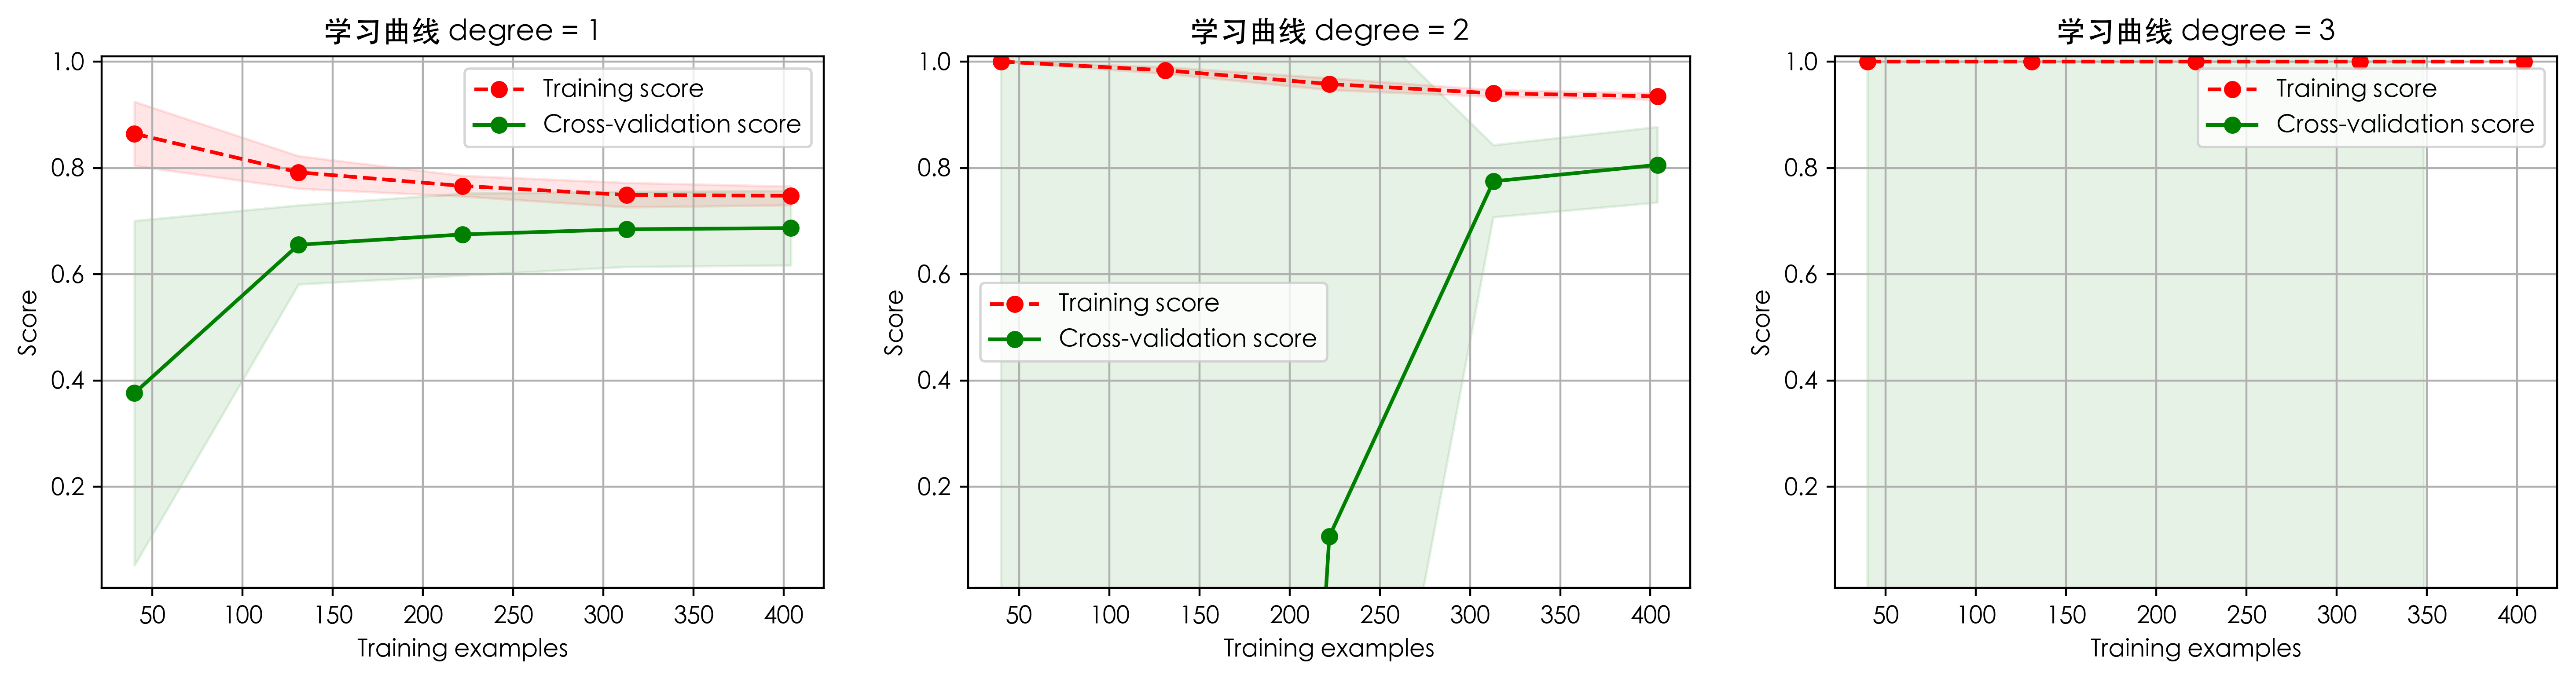

In [27]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
plt.figure(figsize=(18,4),dpi=200)
title = '学习曲线 degree = {0}'

degrees = [1,2,3]
plt.figure(figsize=(18,4),dpi=200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(plt,polynomial_model(degrees[i]),title.format(degrees[i]),X,y,ylim=(0.01,1.01),cv=cv)

打个比方，有一个储钱罐里有 1 角的硬币 10 枚，5 角的硬币 2 枚，1 元的硬币 1 枚，总计 3 元，13 枚硬币。你随机从里面取 1000 次，每次取出来的硬币把币值记录下来，然后放回储钱罐里。这样最后去算这 1000 次取出来的钱的平均值 (1000 次取出来的币值总和除以 1000) 和储钱罐里每枚硬币的平均值 (3/13 元) 应该是近似相等的。

In [29]:
30/13

2.3076923076923075

In [31]:
coins = [1]*10 + [5]*2+ [10]*1
coins

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 10]

In [39]:
import random

val_sum = 0
for i in range(1000000):
    val_sum += coins[random.randint(0,12)]
val_sum

2306193

In [40]:
val_sum/1000000

2.306193